In [98]:
#TOC model is Poisson
#NH3 model is normal distributed with claimed mean 0.090000 and known standard deviation 0.01
#DO model is normal distributed with claimed mean 9.000000
#SO4 model is uniform
#Pb model is uniform


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy.stats import uniform
from scipy.stats import kstest
from scipy.stats import anderson
from numpy import random
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import seaborn as sns

df = pd.read_csv("DATA/WaterContaminantsDAta.txt", sep=",")




In [99]:
def is_uniform_distribution(dataframe, column_name, confidence_level=0.9):
    column_data = dataframe[column_name]
    min_value = column_data.min()
    max_value = column_data.max()

    # Calculate the number of bins based on the square root of the data size
    n = len(column_data)
    k = int(np.sqrt(n))

    # Calculate the observed frequencies in each bin
    observed, _ = np.histogram(column_data, bins=k)

    # Calculate the expected frequencies assuming a uniform distribution
    expected = np.full_like(observed, fill_value=n / k)

    # Perform the chi-square test
    chi2_statistic, p_value, _, _ = chi2_contingency([observed, expected])

    # Calculate the critical value based on the confidence level
    alpha = 1 - confidence_level
    critical_value = chi2.ppf(1 - alpha, df=k - 1)

    # Check if the chi-square statistic is less than the critical value
    if chi2_statistic < critical_value:
        print(
            f"The column '{column_name}' follows a uniform distribution within a {confidence_level * 100}% confidence interval.")
    else:
        print(
            f"The column '{column_name}' does not follow a uniform distribution within a {confidence_level * 100}% confidence interval.")

    print(f"Chi-square statistic: {chi2_statistic}")
    print(f"Critical value: {critical_value}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\1413376473.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_TOC, hist=True, label='TOC')
C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\1413376473.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=6, siz

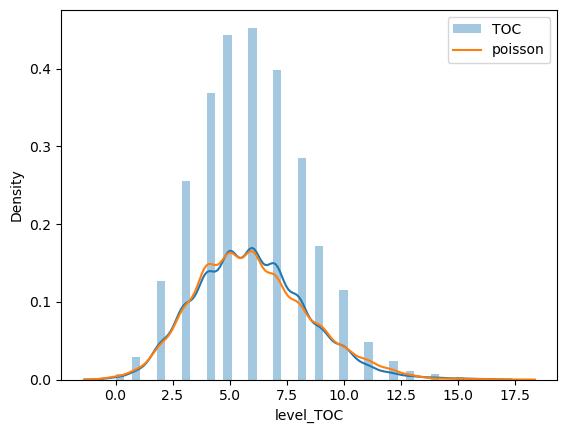

Variance of TOC is 5.717803100710777
Mean of TOC is 5.955738078941365


In [100]:


#TOC
sns.distplot(df.level_TOC, hist=True, label='TOC')
sns.distplot(random.poisson(lam=6, size=4400), hist=False, label='poisson')
plt.legend()
plt.show()

# for this to be poisson distribution, mean needs to equal vairence


print("Variance of TOC is % s"%(statistics.variance(df.level_TOC)))
print("Mean of TOC is % s"%(np.mean(df.level_TOC)))


Mean of NH3 is 0.09010899669176364
Median of NH3 is 0.0899234
STD of NH3 is 0.010069931111380359


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\2954391034.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_NH3, hist=True, label='NH3')


<Axes: xlabel='level_NH3', ylabel='Density'>

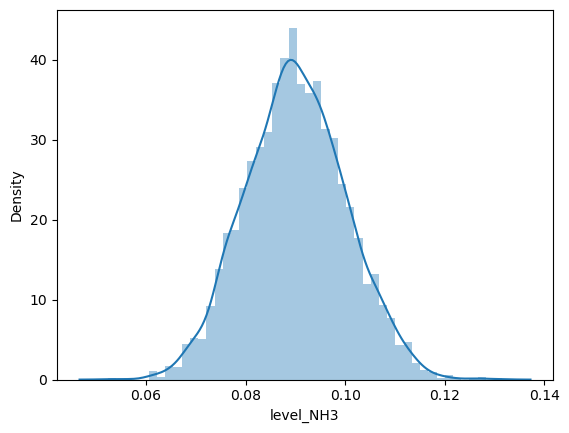

In [101]:
#NH3 model is normal distributed with claimed mean 0.090000 and known standard deviation 0.01
#for this to be true, mean median and mode need to be equal
print("Mean of NH3 is % s"%(np.mean(df.level_NH3)))
#print("Mode of NH3 is % s" % (statistics.mode(df.level_NH3)))
print("Median of NH3 is % s" % (statistics.median(df.level_NH3)))
print("STD of NH3 is % s"%(np.std(df.level_NH3)))
sns.distplot(df.level_NH3, hist=True, label='NH3')

Mean of DO is 9.016346433264887
Median of DO is 9.027724
STD of DO is 1.0149196664245148


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\221786711.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_DO, hist=True, label='DO')


<Axes: xlabel='level_DO', ylabel='Density'>

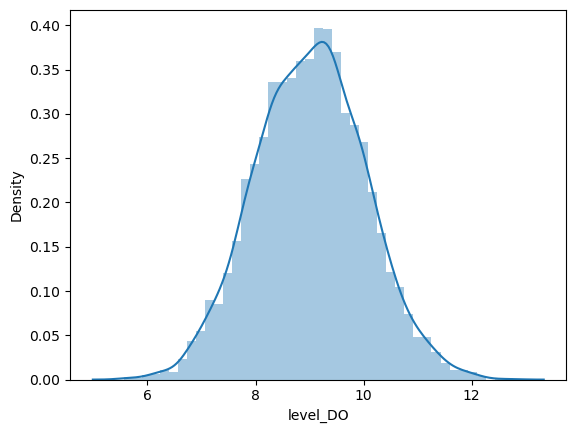

In [102]:
#DO model is normal distributed with claimed mean 9.000000
#for this to be true, mean median and mode need to be equal
print("Mean of DO is % s" % (np.mean(df.level_DO)))
#print("Mode of DO is % s" % (statistics.mode(df.level_DO)))
print("Median of DO is % s" % (statistics.median(df.level_DO)))
print("STD of DO is % s" % (np.std(df.level_DO)))
sns.distplot(df.level_DO, hist=True, label='DO')

C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\2355309699.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_SO4, hist=True, label='SO4')


The column 'level_SO4' does not follow a uniform distribution within a 90.0% confidence interval.
Chi-square statistic: 4476.897615035741
Critical value: 79.97300265487546
Minimum value: 0.01220826
Maximum value: 515.9413


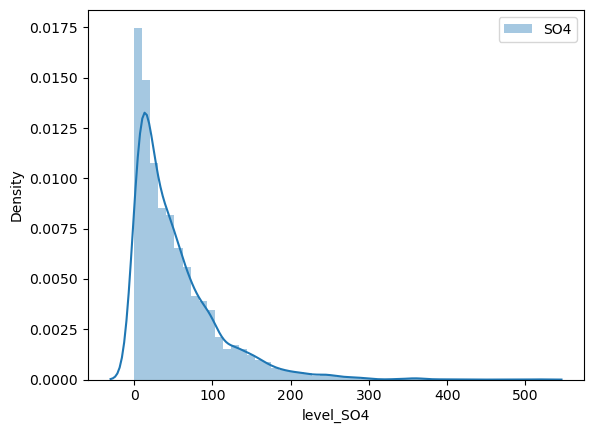

In [103]:
#SO4 model is uniform
sns.distplot(df.level_SO4, hist=True, label='SO4')
is_uniform_distribution(
    df, 'level_SO4', confidence_level=0.9)

plt.legend()
plt.show()


C:\Users\bruno\AppData\Local\Temp\ipykernel_8540\3568739676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.level_Pb, hist=True, label='Pb')


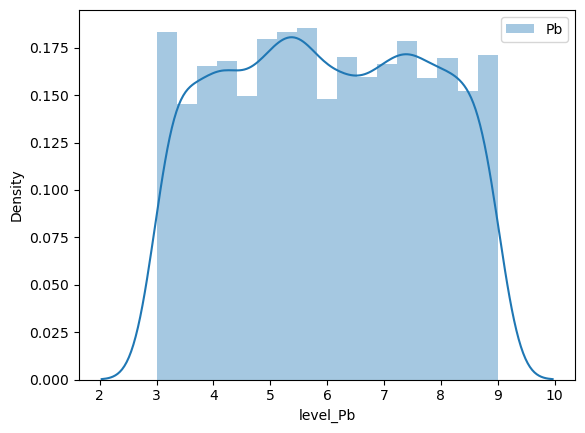

The column 'level_Pb' follows a uniform distribution within a 90.0% confidence interval.
Chi-square statistic: 41.965189021975945
Critical value: 79.97300265487546
Minimum value: 3.001771
Maximum value: 8.998878


In [104]:
#Pb model is uniform
sns.distplot(df.level_Pb, hist=True, label='Pb')

plt.legend()
plt.show()

#is_uniform_distribution(df, 'level_Pb')
#is_uniform_distribution(df, 'level_SO4')
is_uniform_distribution(
    df, 'level_Pb', confidence_level=0.9)
